In [9]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db_username_read = open('db_username.txt')
db_username = db_username_read.read()
db_username_read.close()

db_password_read = open('db_password.txt')
db_password = db_password_read.read()
db_password_read.close()

db_host_read = open('db_host.txt')
db_host = db_host_read.read()
db_host_read.close()

connection = cx_Oracle.connect(user=db_username, password=db_password, dsn=db_host)
cursor = connection.cursor()

# Wyciągnięcie danych z bazy
query = """
SELECT SUMMARY_ID, YEAR, BEST_SELLING_NA, BEST_SELLING_NA_SALES, BEST_SELLING_EU, BEST_SELLING_EU_SALES, BEST_SELLING_JP, BEST_SELLING_JP_SALES, BEST_SELLING_TOTAL, BEST_SELLING_TOTAL_SALES, NUMER_OF_GAMES, DEVELOPER_WITH_MOST_GAMES, DEVELOPER_WITH_MOST_GAMES_NUMBER, PUBLISHER_WITH_MOST_SOLD_GAMES, PUBLISHER_WITH_MOST_SOLD_GAMES_NUMBER, MOST_POPULAR_PLATFORM, MOST_POPULAR_GENRE
FROM game_sales_annual_summary
"""
cursor.execute(query)

columns = ["SUMMARY_ID", "YEAR", "BEST_SELLING_NA", "BEST_SELLING_NA_SALES", "BEST_SELLING_EU", "BEST_SELLING_EU_SALES", "BEST_SELLING_JP", "BEST_SELLING_JP_SALES", "BEST_SELLING_TOTAL", "BEST_SELLING_TOTAL_SALES", "NUMER_OF_GAMES", "DEVELOPER_WITH_MOST_GAMES", "DEVELOPER_WITH_MOST_GAMES_NUMBER", "PUBLISHER_WITH_MOST_SOLD_GAMES", "PUBLISHER_WITH_MOST_SOLD_GAMES_NUMBER", "MOST_POPULAR_PLATFORM", "MOST_POPULAR_GENRE"]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)

df.head()

,SUMMARY_ID,YEAR,BEST_SELLING_NA,BEST_SELLING_NA_SALES,BEST_SELLING_EU,BEST_SELLING_EU_SALES,BEST_SELLING_JP,BEST_SELLING_JP_SALES,BEST_SELLING_TOTAL,BEST_SELLING_TOTAL_SALES,NUMER_OF_GAMES,DEVELOPER_WITH_MOST_GAMES,DEVELOPER_WITH_MOST_GAMES_NUMBER,PUBLISHER_WITH_MOST_SOLD_GAMES,PUBLISHER_WITH_MOST_SOLD_GAMES_NUMBER,MOST_POPULAR_PLATFORM,MOST_POPULAR_GENRE
0,1,2004,Grand Theft Auto: San Andreas,9430000,World of Warcraft,6210000,Dragon Quest VIII: Journey of the Cursed King,3610000,Grand Theft Auto: San Andreas,20810000,476,EA Canada,14,Electronic Arts,62289998,PS2,Action
1,2,2005,Mario Kart DS,9710000,Brain Age: Train Your Brain in Minutes a Day,9200000,Animal Crossing: Wild World,5330000,Mario Kart DS,23210000,562,EA Canada,31,Nintendo,94470000,PS2,Action
2,3,2007,Wii Fit,8920000,Wii Fit,8029999,Wii Fit,3600000,Wii Fit,22699999,590,EA Canada,22,Nintendo,92489999,Wii,Action
3,4,2010,Kinect Adventures!,15000000,Kinect Adventures!,4890000,Wii Party,2490000,Kinect Adventures!,21820000,429,Ubisoft Montreal,10,Electronic Arts,70860000,X360,Action
4,5,2012,Call of Duty: Black Ops II,8250000,Call of Duty: Black Ops II,5730000,Animal Crossing: New Leaf,4390000,Call of Duty: Black Ops II,13790000,313,Electronic Arts,11,Activision,47430000,PS3,Action


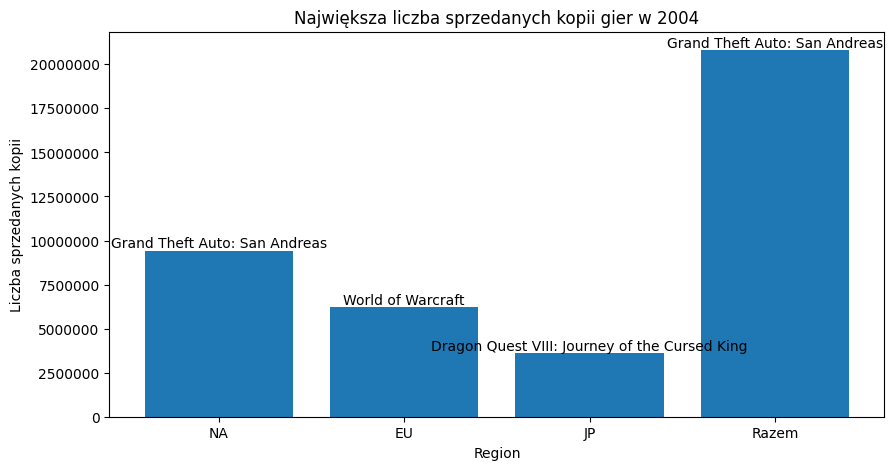

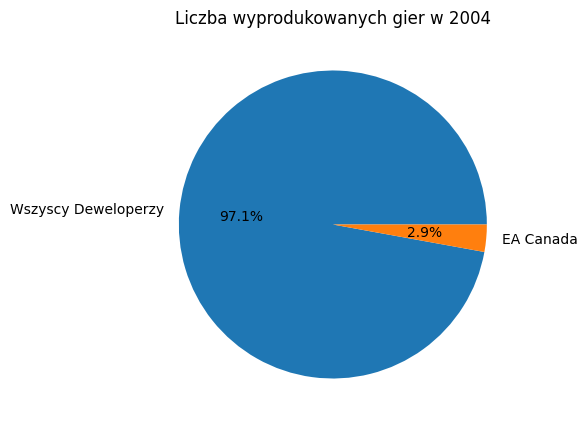

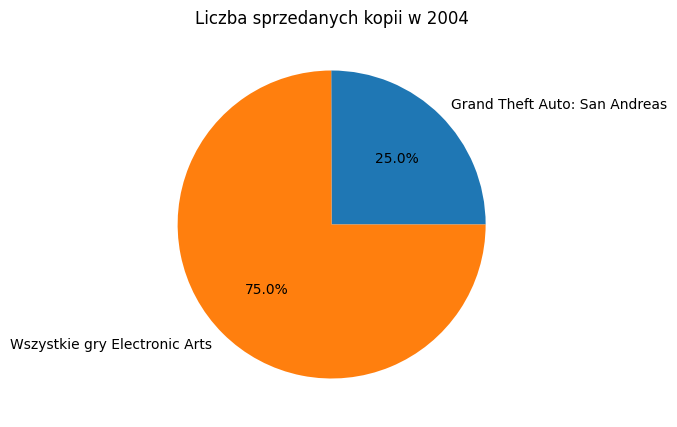

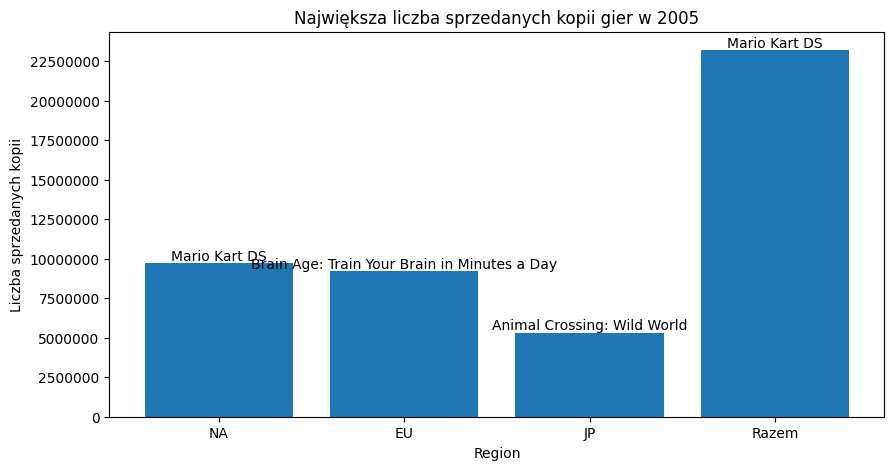

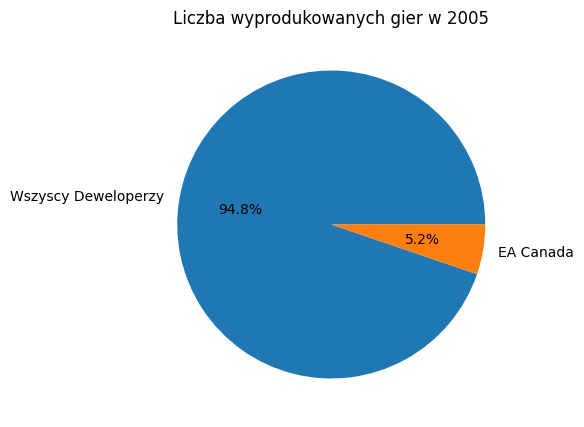

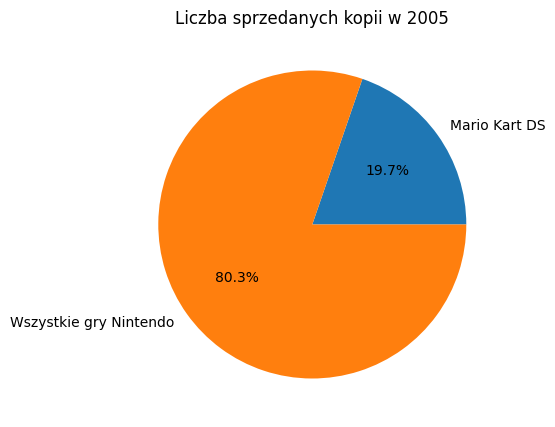

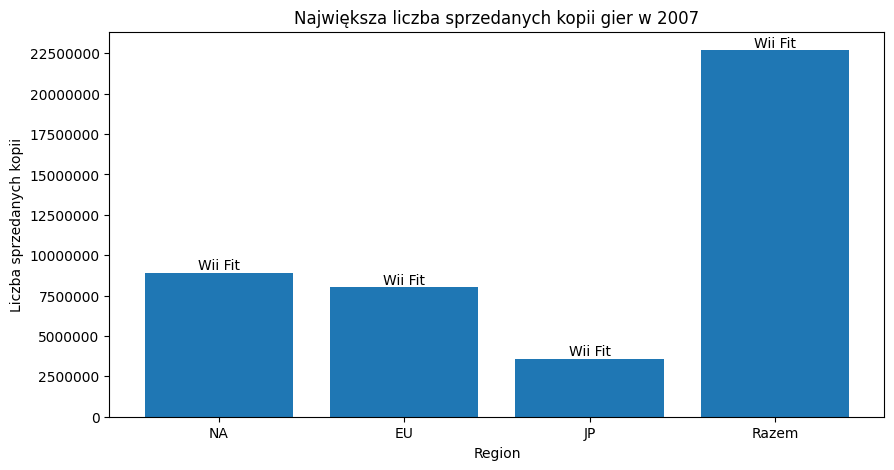

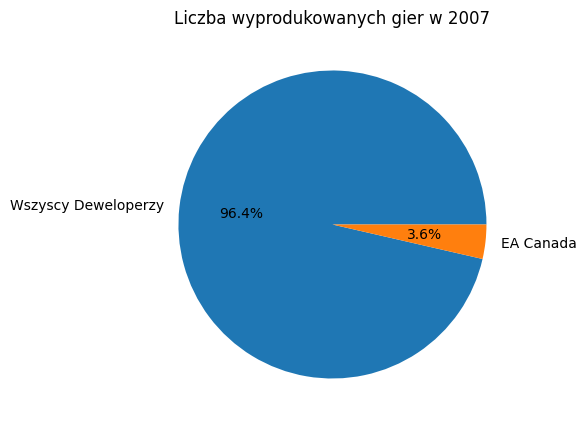

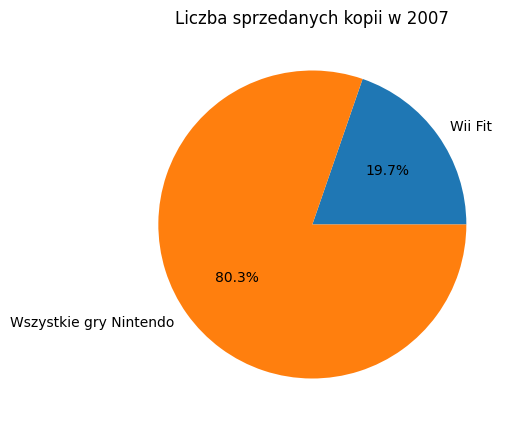

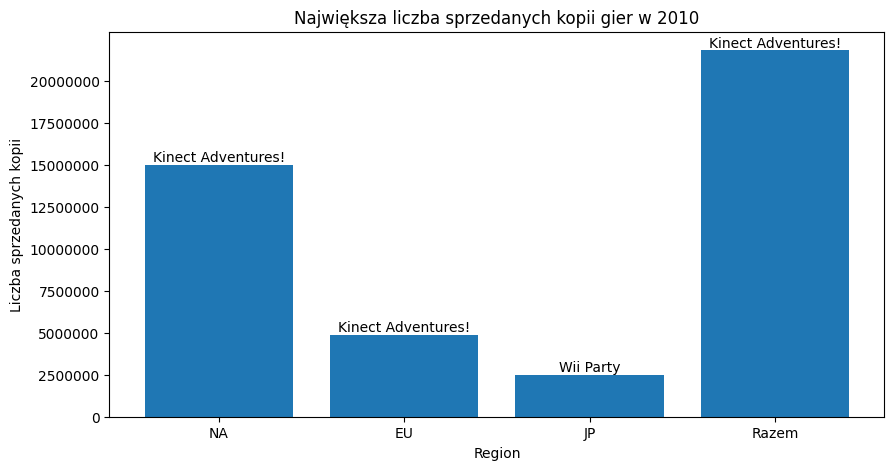

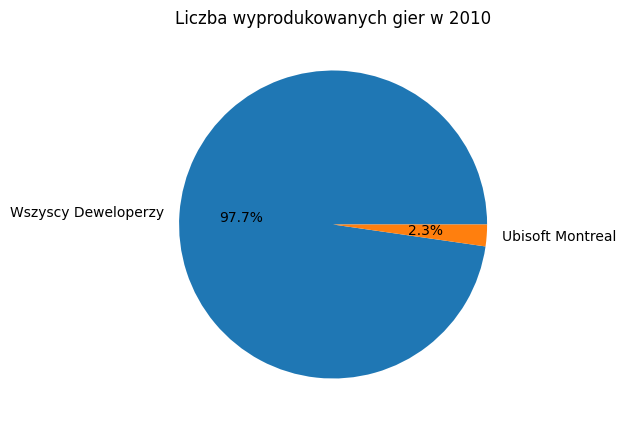

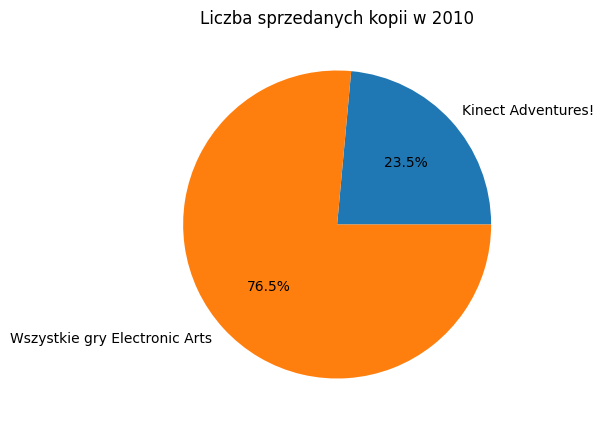

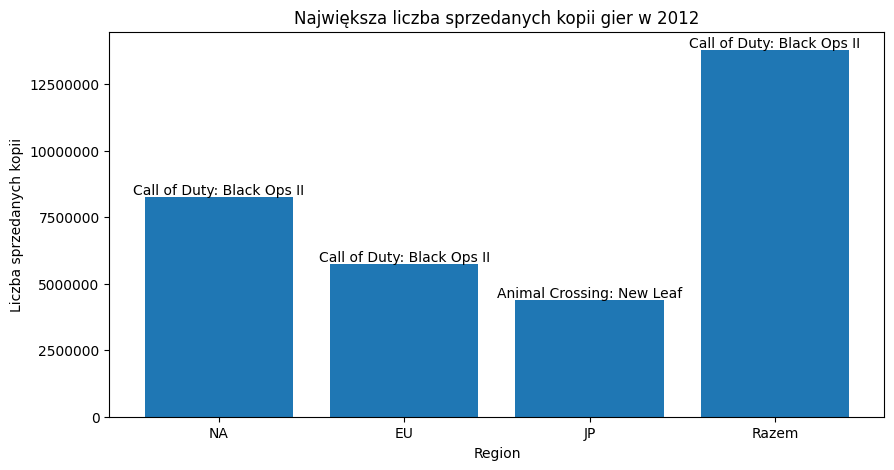

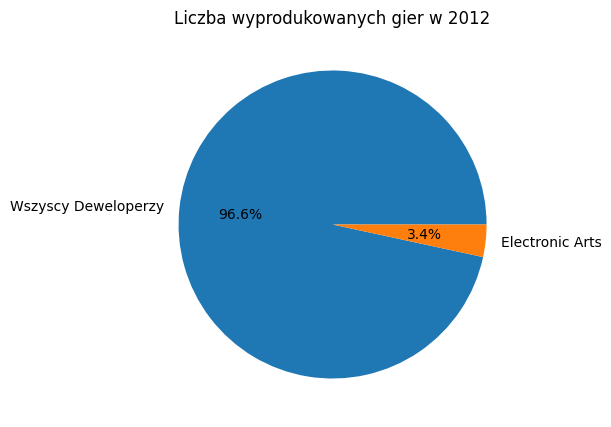

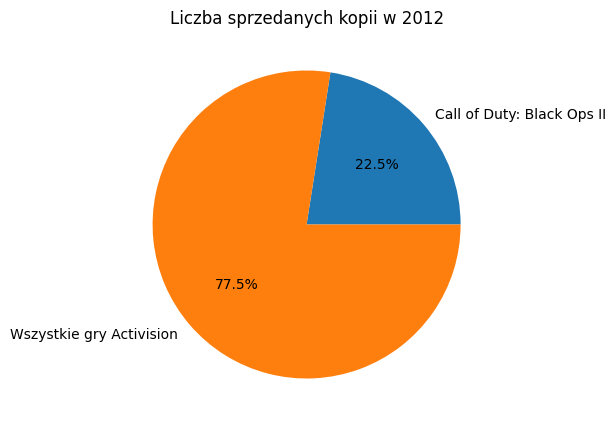

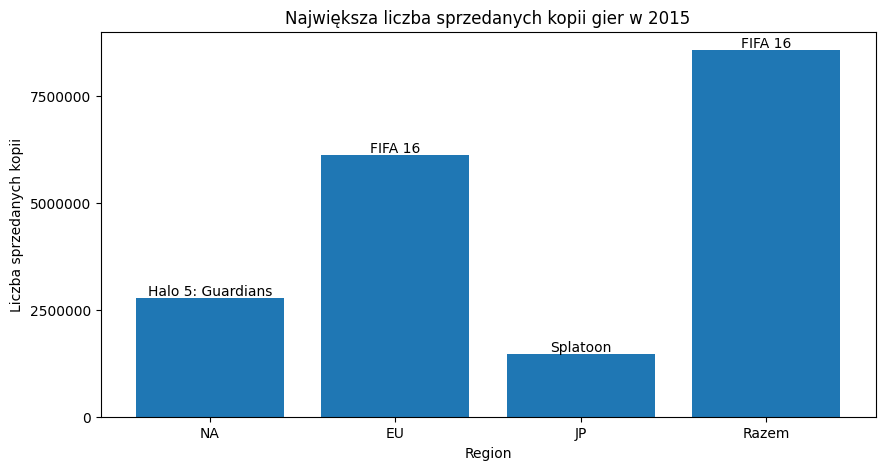

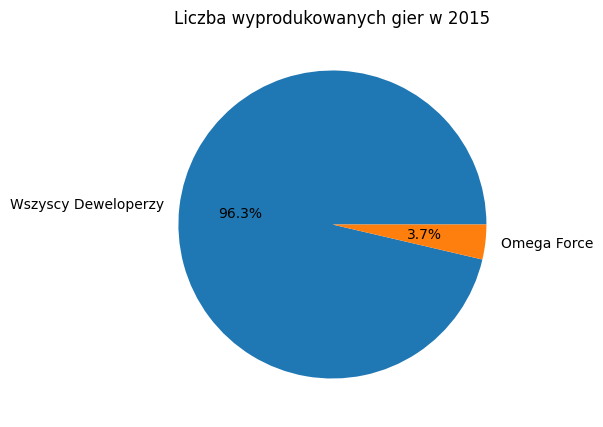

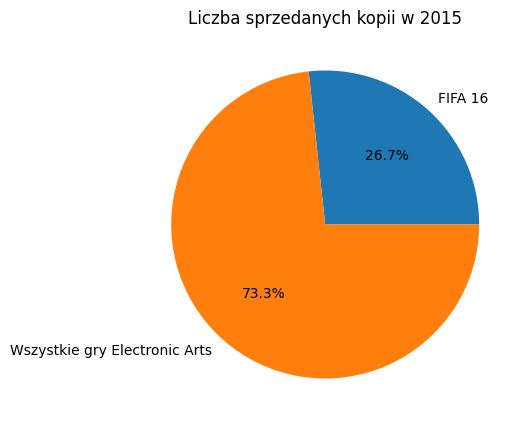

In [10]:
for year in df['YEAR'].unique():
    plt.figure(figsize=(10, 5))
    new_df = df[df['YEAR'] == year]
    sales = [new_df['BEST_SELLING_NA_SALES'].iloc[0], new_df['BEST_SELLING_EU_SALES'].iloc[0], new_df['BEST_SELLING_JP_SALES'].iloc[0], new_df['BEST_SELLING_TOTAL_SALES'].iloc[0]]
    games = [new_df['BEST_SELLING_NA'].iloc[0], new_df['BEST_SELLING_EU'].iloc[0], new_df['BEST_SELLING_JP'].iloc[0], new_df['BEST_SELLING_TOTAL'].iloc[0]]
    plt.bar(['NA', 'EU', 'JP', 'Razem'], sales)
    for i in range(4):
        plt.text(i, sales[i], games[i], ha='center', va='bottom')
    plt.title(f'Największa liczba sprzedanych kopii gier w {year}')
    plt.xlabel('Region')
    plt.ylabel('Liczba sprzedanych kopii')
    plt.ticklabel_format(style='plain', axis='y')
    plt.yticks(range(0, max(sales) + 1, 2500000))
    plt.show()
    
    plt.figure(figsize=(10, 5))
    games_number = [new_df['NUMER_OF_GAMES'].iloc[0], new_df['DEVELOPER_WITH_MOST_GAMES_NUMBER'].iloc[0]]
    plt.pie(games_number, labels=['Wszyscy Deweloperzy', new_df['DEVELOPER_WITH_MOST_GAMES'].iloc[0]], autopct='%1.1f%%')
    plt.title(f'Liczba wyprodukowanych gier w {year}')
    plt.show()

    plt.figure(figsize=(10, 5))
    sales = [new_df['BEST_SELLING_TOTAL_SALES'].iloc[0], new_df['PUBLISHER_WITH_MOST_SOLD_GAMES_NUMBER'].iloc[0]]
    plt.pie(sales, labels=[new_df['BEST_SELLING_TOTAL'].iloc[0], 'Wszystkie gry ' + new_df['PUBLISHER_WITH_MOST_SOLD_GAMES'].iloc[0]], autopct='%1.1f%%')
    plt.title(f'Liczba sprzedanych kopii w {year}')
    plt.show()

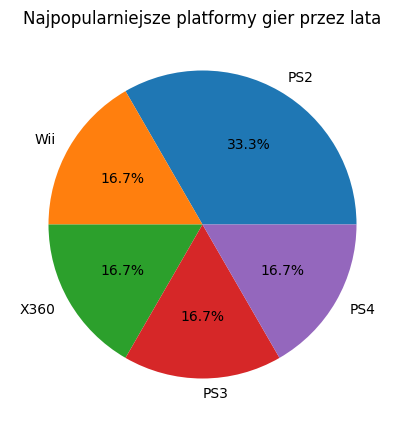

In [11]:
platforms = df['MOST_POPULAR_PLATFORM'].value_counts()

# Generowanie wykresu
plt.figure(figsize=(10, 5))
plt.pie(platforms.values, labels=platforms.index, autopct='%1.1f%%')
plt.title('Najpopularniejsze platformy gier przez lata')
plt.show()

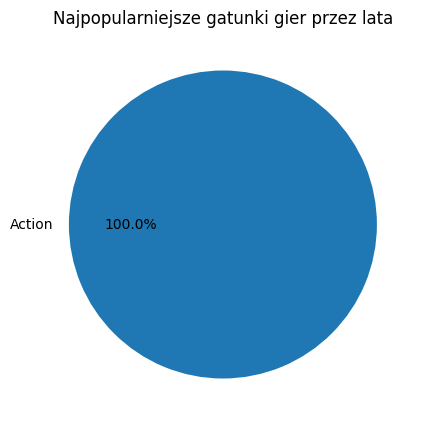

In [12]:
genres = df['MOST_POPULAR_GENRE'].value_counts()

# Generowanie wykresu
plt.figure(figsize=(10, 5))
plt.pie(genres.values, labels=genres.index, autopct='%1.1f%%')
plt.title('Najpopularniejsze gatunki gier przez lata')
plt.show()